<a href="https://colab.research.google.com/github/SahilAgarwal03/Python_Projects/blob/main/Uber_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - UBER SUPPLY DEMAND EDA



##### **Project Type**    - EDA
##### **Contribution**    - Individual
##### **Team Member 1 -**  Sahil Agarwal


# **Project Summary -**

This project focuses on analyzing Uber ride request data to understand patterns in user demand, driver availability, and trip outcomes. The aim is to identify potential gaps between supply and demand by examining factors such as time slots, pickup points, and trip status. The insights derived will help propose effective strategies to improve ride fulfillment rates and optimize Uber’s operations.

# **GitHub Link -**

https://github.com/SahilAgarwal03

# **Problem Statement**


Uber often experiences a mismatch between customer ride requests and available drivers, especially during specific time slots and pickup points. This results in high cancellation rates and "No Cars Available" issues, leading to unmet demand, customer dissatisfaction, and revenue loss. The objective of this project is to analyze trip data to identify when and where these gaps occur and to suggest data-driven solutions for improving service efficiency.

#### **Define Your Business Objective?**

To minimize the gap between ride demand and driver availability in order to reduce cancellations and "No Cars Available" incidents. The goal is to improve customer satisfaction, optimize driver utilization, and increase overall operational efficiency for Uber through data-driven insights and targeted interventions.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [4]:
# Import Libraries
from google.colab import drive
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import seaborn as sns

### Dataset Loading

In [5]:
# Load Dataset
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/My Drive/Uber Project/Uber Request Data.csv')
df_minutes = pd.read_csv('/content/drive/My Drive/Uber Project/Sql Insights/Time Taken For every Trip.csv')
df_drivers = pd.read_csv('/content/drive/My Drive/Uber Project/Sql Insights/Requests Per Drivers.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset First View

In [6]:
# Dataset First Look
display(df.head())

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns count
display(df.shape)

(6745, 6)

### Dataset Information

In [8]:
# Dataset Info
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


None

#### Duplicate Values

In [9]:
# Dataset Duplicate Value Count
display(df.duplicated().sum())

np.int64(0)

#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count
display(df.isnull().sum())

,0
Request id,0
Pickup point,0
Driver id,2650
Status,0
Request timestamp,0
Drop timestamp,3914


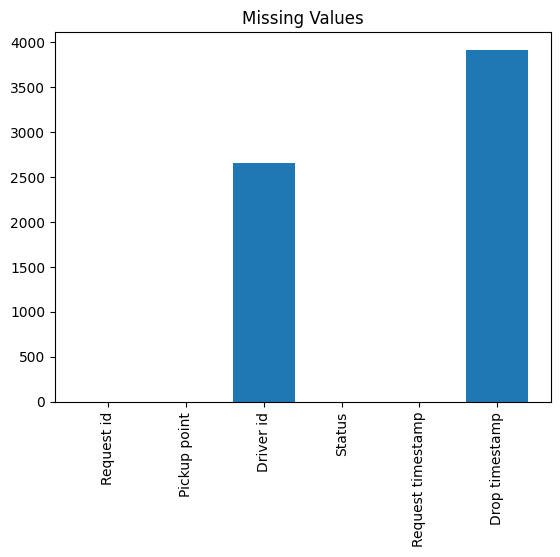

In [11]:
# Visualizing the missing values

# Bar plot for visulization
plt.bar(df.isnull().sum().index, df.isnull().sum().values)
plt.title('Missing Values')

# Rotating the column names 90 degree to incerase readability
plt.xticks(rotation=90)
plt.show()

## ***2. Understanding Your Variables***

In [12]:
# Dataset Columns
display(df.columns)

Index(['Request id', 'Pickup point', 'Driver id', 'Status',
       'Request timestamp', 'Drop timestamp'],
      dtype='object')

In [13]:
# Dataset Describe
display(df.describe())

,Request id,Driver id
count,6745.000000,4095.000000
mean,3384.644922,149.501343
std,1955.099667,86.051994
min,1.000000,1.000000
25%,1691.000000,75.000000
50%,3387.000000,149.000000
75%,5080.000000,224.000000
max,6766.000000,300.000000


### Check Unique Values for each variable.

In [14]:
# Check Unique Values for each variable.
display(df.nunique())

,0
Request id,6745
Pickup point,2
Driver id,300
Status,3
Request timestamp,5618
Drop timestamp,2598


## 3. ***Data Wrangling***

### Data Wrangling Code

In [15]:
# Write your code to make your dataset analysis ready.

df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], errors='coerce')
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], errors = 'coerce')

df['Request time'] = df['Request timestamp'].dt.time
df['Drop time'] = df['Drop timestamp'].dt.time
df['Request date'] = df['Request timestamp'].dt.date
df['Drop date'] = df['Drop timestamp'].dt.date
df['Request hour'] = df['Request timestamp'].dt.hour
df.drop('Request timestamp', axis=1, inplace=True)
df.drop('Drop timestamp', axis=1, inplace=True)


## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

/tmp/ipython-input-16-1601522211.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Time Slot', order=['Evening', 'Morning', 'Afternoon', 'Night'], palette='Set1')


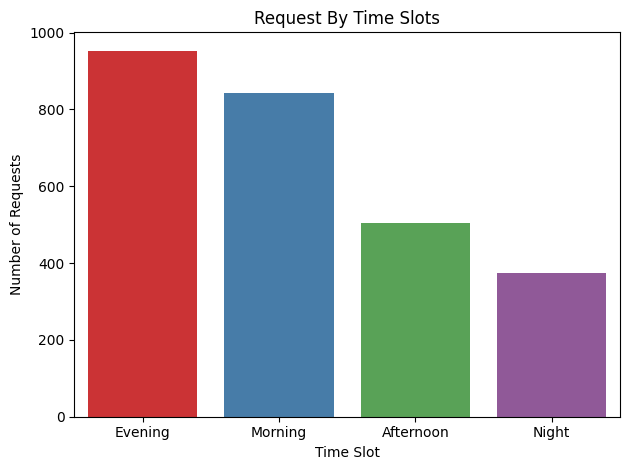

In [16]:
# Chart - 1 visualization code
# Lets see Number of Request by Time Slots

# Lets create slots using functions
def time_slots(hour):
    if pd.isnull(hour):
        return 'Unknown'
    elif 0 <= hour < 6:
        return 'Night'
    elif 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 18:
        return 'Afternoon'
    else:
        return 'Evening'
df['Time Slot'] = df['Request hour'].apply(time_slots)

# Ploting the chart using seaborn
sns.countplot(data=df, x='Time Slot', order=['Evening', 'Morning', 'Afternoon', 'Night'], palette='Set1')
plt.title('Request By Time Slots')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to visualize ride request volume across different time slots and identify peak demand periods.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that ride requests are highest in the Evening, followed by the Morning, indicating peak hours. Afternoon and Night have significantly lower demand. These trends align with common commuting and travel behavior. It highlights when Uber should focus on optimizing driver availability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can create a positive impact by helping Uber deploy more drivers during high-demand time slots, reducing missed trips.
Knowing peak times enables targeted driver incentives and better fleet utilization. However, if the supply isn’t adjusted based on this data, unfulfilled demand in peak slots can lead to poor customer experience and revenue loss. So ignoring this insight could result in negative growth due to repeat cancellations and user churn.

#### Chart - 2

/tmp/ipython-input-17-1797211019.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=request_point, x='Pickup point', y='Request id',order=['City', 'Airport'], palette='OrRd')


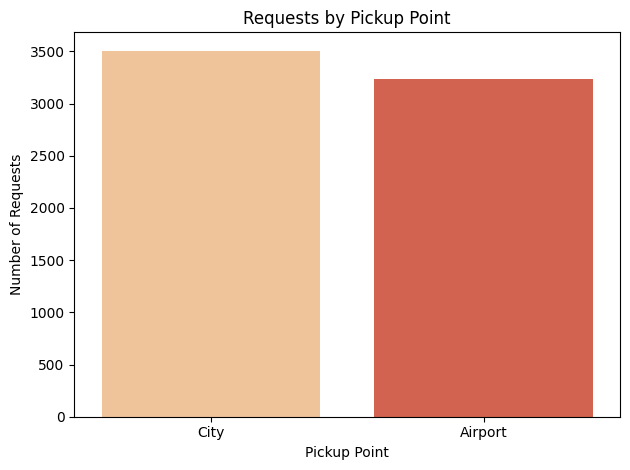

In [17]:
# Chart - 2 visualization code
# Lets see numner of requests by pickup point

# Grouing Pickup Point and Request id using Pandas
request_point = df.groupby('Pickup point')['Request id'].count().reset_index()

# Ploting using Seaborn
sns.barplot(data=request_point, x='Pickup point', y='Request id',order=['City', 'Airport'], palette='OrRd')
plt.title('Requests by Pickup Point')
plt.xlabel('Pickup Point')
plt.ylabel('Number of Requests')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to compare the number of ride requests originating from different pickup points — City vs Airport — and identify location-specific demand patterns.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that the City has slightly higher ride request volume than the Airport. Both locations contribute significantly to total demand, making them operationally important. This suggests that Uber must balance its supply between both pickup zones. Ignoring either zone can lead to location-specific supply shortages

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help Uber allocate drivers more effectively between City and Airport zones, reducing wait times and cancellations. This can improve user satisfaction and increase completed rides. However, if Uber fails to recognize the balanced demand from both zones and focuses on one more than the other, it may cause location-wise supply gaps, especially during peak hours.
Such imbalance can negatively impact revenue and hurt customer trust in underserved areas.

#### Chart - 3

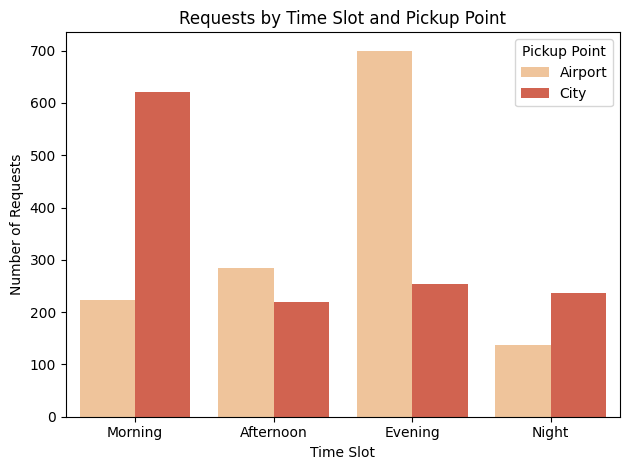

In [18]:
# Chart - 3 visualization code
# Lets see number of request by Pickup point during different Time slots

# Filtering Unknown from the dataset
df_filtered = df[df['Time Slot'] != 'Unknown']

# Ploting using Seaborn
sns.countplot(data=df_filtered, x='Time Slot', hue='Pickup point', palette='OrRd')
plt.title('Requests by Time Slot and Pickup Point')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.legend(title='Pickup Point')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to understand how demand varies by both time of day and pickup location, allowing for a more granular view of user behavior.

##### 2. What is/are the insight(s) found from the chart?

The chart reveals that City sees high demand in the Morning, likely due to office commutes. In contrast, the Airport experiences peak demand in the Evening, probably from arriving travelers. Night and Afternoon have relatively lower demand from both pickup points. These insights highlight time-location combinations where supply needs to be adjusted.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights enable Uber to dynamically allocate drivers based on time and pickup point, reducing unavailability during high-demand periods.
Proactively managing supply in specific zones during their respective peaks can improve trip completion rates and revenue. However, ignoring these patterns may lead to driver shortages at the Airport in the Evening or in the City in the Morning, causing service delays and customer dissatisfaction. This mismatch can lead to negative business impact due to lost rides and poor user retention.

#### Chart - 4

/tmp/ipython-input-19-2254839240.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Status',order=['Trip Completed', 'No Cars Available', 'Cancelled'], palette='YlGnBu')


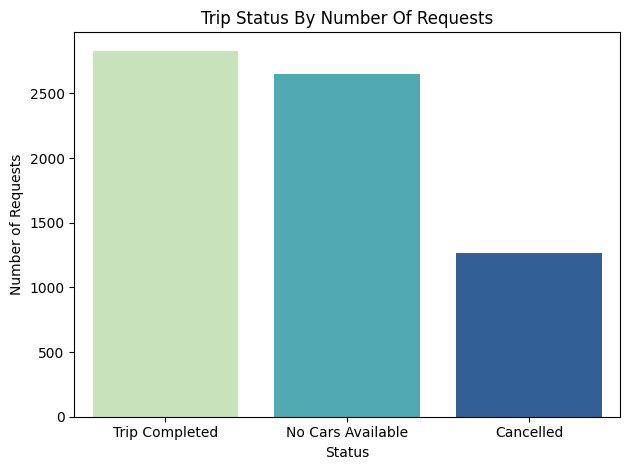

In [19]:
# Chart - 4 visualization code
# Lets see Trip Status by Number of Request
sns.countplot(data=df, x='Status',order=['Trip Completed', 'No Cars Available', 'Cancelled'], palette='YlGnBu')
plt.title('Trip Status By Number Of Requests')
plt.ylabel('Number of Requests')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to analyze how user ride requests ended — whether they were completed, cancelled, or marked as "No Cars Available" — giving insight into Uber’s service efficiency.

##### 2. What is/are the insight(s) found from the chart?

The chart shows that “Trip Completed” has the highest count, which is good for business. However, the number of “No Cars Available” is almost as high, indicating a major supply shortage. Cancellations are also significant, suggesting driver or rider drop-off behavior. This highlights that a large portion of requests remain unfulfilled, especially during peak times.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help Uber take action to reduce cancellations and improve driver availability, which directly boosts fulfillment rates and revenue. Understanding why trips are not completed can lead to smarter policies and better driver management. On the flip side, high "No Cars Available" and cancellations indicate customer dissatisfaction and loss of revenue, which can cause negative growth. If left unaddressed, this could lead to fewer returning users and bad app ratings, harming the business long-term.

#### Chart - 5

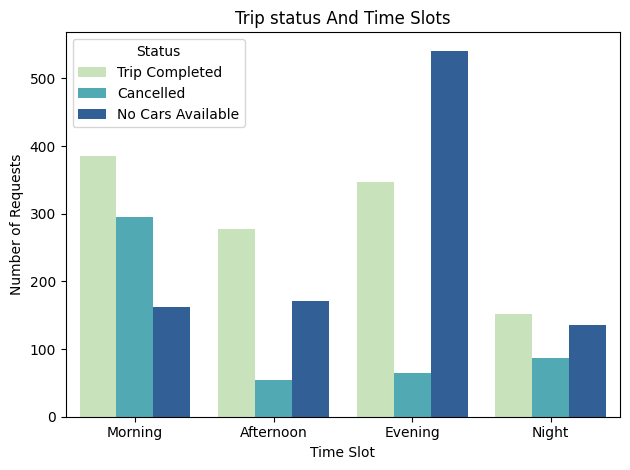

In [20]:
# Chart - 5 visualization code
# Lets explore Trip status during different Time Slots

# Filtering Unknown from the dataset
df_filtered = df[df['Time Slot'] != 'Unknown']

# Ploting the chart using seaborn
sns.countplot(data=df_filtered, x='Time Slot', hue='Status', palette='YlGnBu')
plt.title('Trip status And Time Slots')
plt.xlabel('Time Slot')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to observe how trip outcomes (Completed, Cancelled, No Cars Available) vary across different time slots, helping to identify when service failures occur most.

##### 2. What is/are the insight(s) found from the chart?

The Evening time slot has the highest number of "No Cars Available" cases, showing a major supply shortage during peak demand. Morning shows a higher number of cancellations, likely due to drivers rejecting rides or customer impatience. Trip completions are highest in Morning and Evening but still lower than the total request volume. This indicates significant unfulfilled demand during peak hours.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help Uber focus on driver incentives and better availability during Morning and Evening slots, improving trip completion rates.
They also highlight the need for strategies to reduce cancellations during Morning hours. If these patterns are ignored, unfulfilled demand during peak hours could lead to lost revenue, longer wait times, and frustrated users, ultimately resulting in negative growth. Hence, aligning supply with time-specific demand is critical for business improvement.



#### Chart - 6

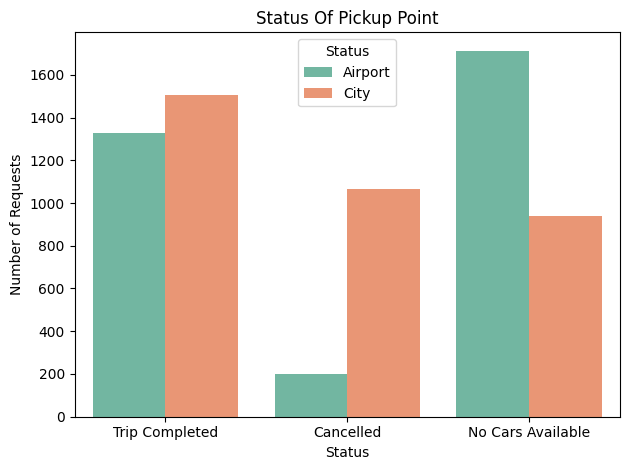

In [21]:
# Chart - 6 visualization code

# Lets see the trip status by Pickup Point
sns.countplot(data=df, x='Status', hue='Pickup point', palette='Set2')
plt.title('Status Of Pickup Point')
plt.xlabel('Status')
plt.ylabel('Number of Requests')
plt.legend(title='Status')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to analyze how trip outcomes (Completed, Cancelled, No Cars Available) differ between the City and Airport pickup points.

##### 2. What is/are the insight(s) found from the chart?

The Airport has the highest number of "No Cars Available" cases, highlighting a major supply issue there. In contrast, the City has a significantly higher number of cancellations, suggesting driver-side issues like rejection or selective behavior. Trip completions are slightly better in the City than at the Airport. Each location faces a unique issue — Airport lacks supply, while City struggles with driver reliability.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights help Uber implement location-specific strategies — more cars at the Airport and driver engagement policies in the City. This can directly reduce unfulfilled requests and improve customer satisfaction. If these patterns are ignored, the Airport may continue losing rides due to unavailability, while the City may frustrate users with frequent cancellations, both leading to negative growth and reduced loyalty. Addressing each pickup point’s problem individually is crucial for balanced operational improvement.

#### Chart - 7

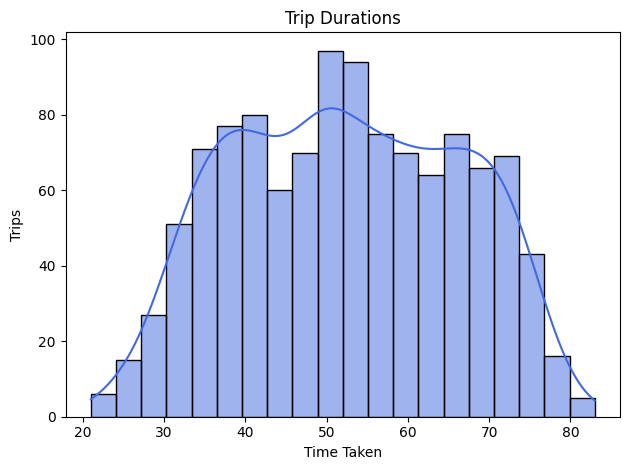

In [22]:
# Chart - 7 visualization code

# Converting time_taken_minutes to numeric values using pandas
df_minutes['time_taken_minutes'] = pd.to_numeric(df_minutes['time_taken_minutes'], errors='coerce')

# Excluding all negetive values
df_minutes = df_minutes[df_minutes['time_taken_minutes'] >= 0]

# Ploting the graph using Seaborn

# Used bins to divide the axis in 20 trips range and kde for the curves
sns.histplot(data=df_minutes, x='time_taken_minutes', bins=20, kde=True, color='royalblue')
plt.title('Trip Durations')
plt.xlabel('Time Taken')
plt.ylabel('Trips')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was selected to understand the distribution of trip durations, which helps in identifying average ride time and operational consistency.

##### 2. What is/are the insight(s) found from the chart?

The chart shows a bell-shaped distribution, with most trips taking around 40 to 65 minutes, peaking at 50–55 minutes. Very short (<30 mins) and very long (>75 mins) trips are rare. This suggests that most Uber rides fall within a standard time window, indicating service stability. The consistent duration hints at repeatable patterns, like fixed-route commutes or airport-city transfers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help Uber optimize pricing, ETA accuracy, and driver shift planning based on average trip durations. Knowing the typical trip time can improve route forecasting and customer satisfaction. There are no negative growth insights here, as the distribution appears stable and balanced — unless extreme trip durations are overlooked in planning. Properly using this data helps in making time-based performance improvements.

#### Chart - 8

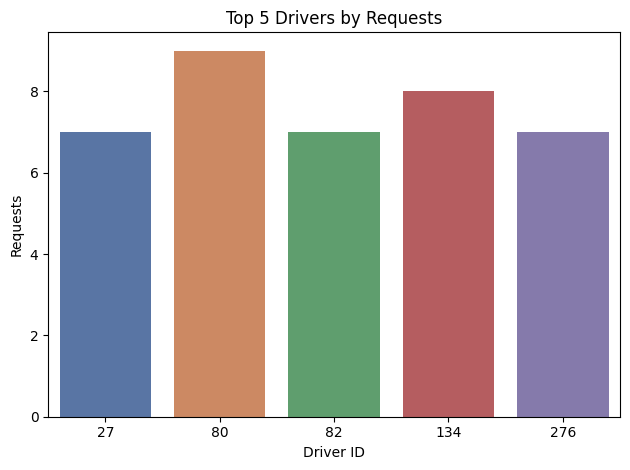

In [23]:
# Lets see the Top 5 Drivers by most number of trips

# Creating the top 5 drivers
top_10 = df_drivers.sort_values(by='Requests', ascending=False).head(5)

# Ploting using seaborn
sns.barplot(data=top_10, x='driver_id', y='Requests', hue='driver_id', palette='deep')
plt.title('Top 5 Drivers by Requests')
plt.xlabel('Driver ID')
plt.ylabel('Requests')
plt.legend().remove()
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart was chosen to identify the most active or in-demand drivers, helping assess workload distribution among Uber drivers.

##### 2. What is/are the insight(s) found from the chart?

Driver ID 80 received the highest number of requests, followed by 134, showing they may be operating during peak hours or in high-demand zones. All top 5 drivers have received 7 or more requests, showing consistent usage of a limited group of drivers. It also indicates that demand is not evenly distributed among the entire driver base. This could suggest either driver preference by users or limited availability of drivers.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, recognizing high-performing drivers can help Uber reward and retain top talent through incentives. However, overloading a few drivers may lead to burnout, cancellations, or poor customer service. The insights suggest a need to balance demand among more drivers to avoid dependence on a few. If not addressed, this imbalance could cause negative growth through driver drop-off or service degradation.

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ?


Uber is facing a supply-demand mismatch, especially during peak hours like Morning and Evening. While the City sees high cancellations, the Airport suffers from unavailability of cars. This leads to a significant number of unfulfilled ride requests, affecting customer experience and operational efficiency.


# **Conclusion**

The analysis clearly highlights a supply-demand mismatch, especially during Evening and Morning time slots. Airport suffers from car unavailability, while the City sees higher cancellations, affecting trip fulfillment. Trip durations are mostly consistent, indicating operational stability, but driver allocation remains uneven. Identifying top-performing drivers and peak demand zones can help in smart resource planning. Targeted solutions like incentives and shift balancing can significantly improve Uber's service efficiency and customer satisfaction.

